<h1><center> Iris Flower Classification </center></h1>
<hr>

 <h1>Objective</h1> 
 <p>The aim is to classify iris flowers among three species from measurements of sepals and petals' length and width.The iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.The central goal here is to design a model that makes useful classifications for new flowers or, in other words, one which exhibits good generalization.</p>
 <hr>

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
import warnings 
warnings.filterwarnings('ignore')

**Importing Data from .csv file**

In [2]:
columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]
dataset = pd.read_csv('iris_data.csv',names=columns)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
dataset.shape

(150, 5)

# Exploratory Data Analysis (EDA)
<hr>

**Histogram of petal length**

sns.FacetGrid(dataset,hue="Species",size=8) \
    .map(sns.distplot,"PetalLengthCm") \
    .add_legend()
plt.show()

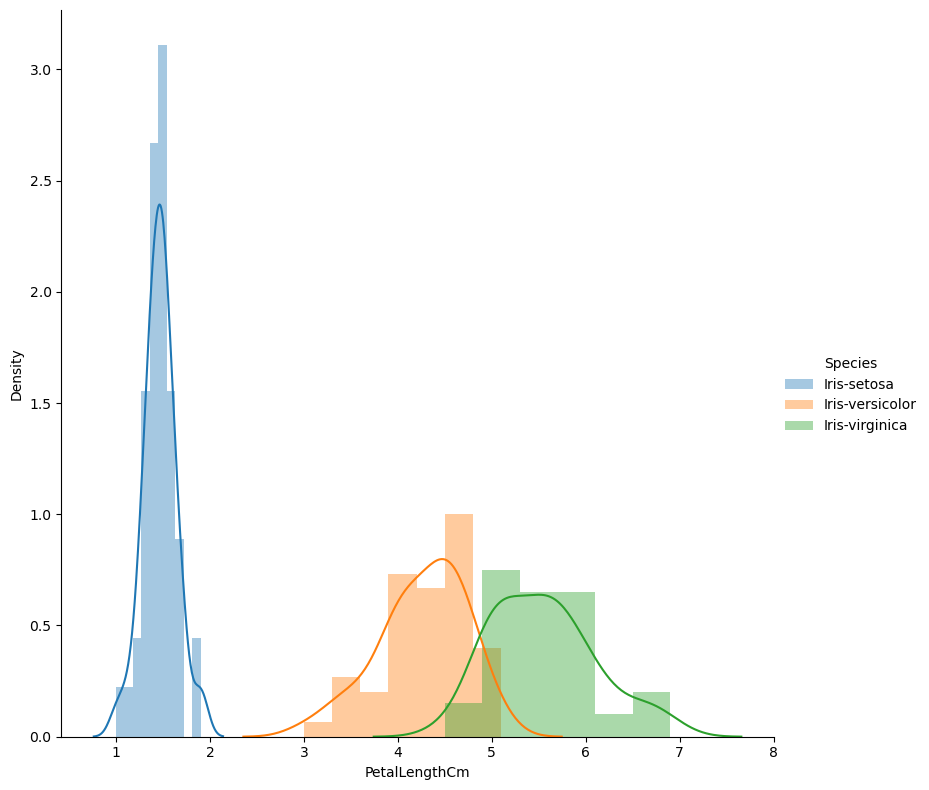

In [5]:
sns.FacetGrid(dataset, hue="Species", height=8) \
    .map(sns.distplot, "PetalLengthCm") \
    .add_legend()
plt.show()


**Histogram of petal width**

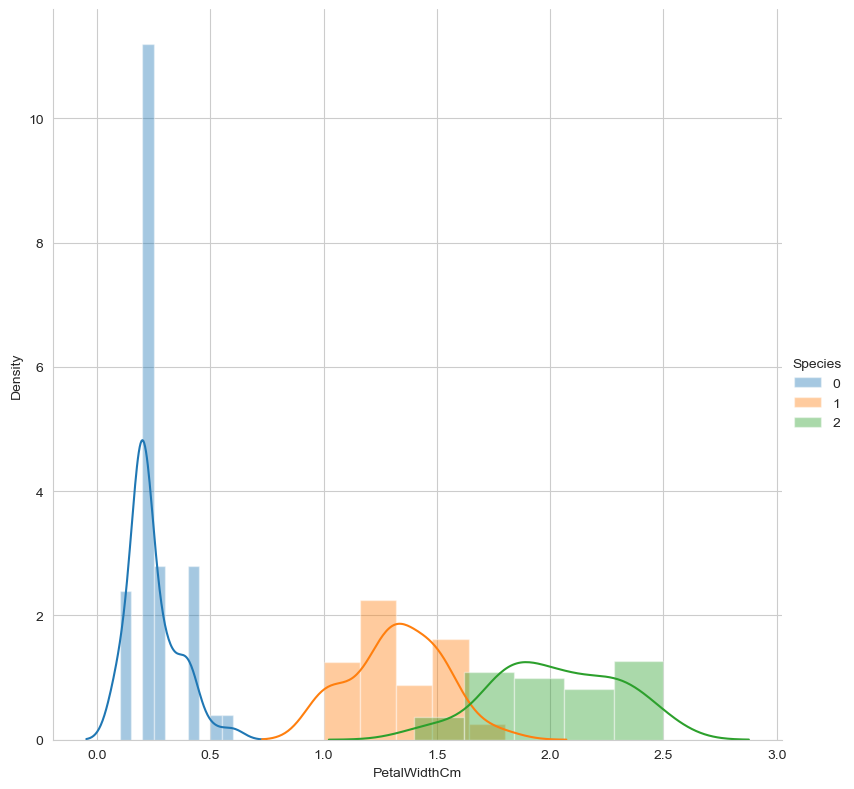

In [46]:
sns.FacetGrid(dataset,hue="Species",height=8) \
    .map(sns.distplot,"PetalWidthCm") \
    .add_legend()
plt.show()

**Histogram of sepal length**

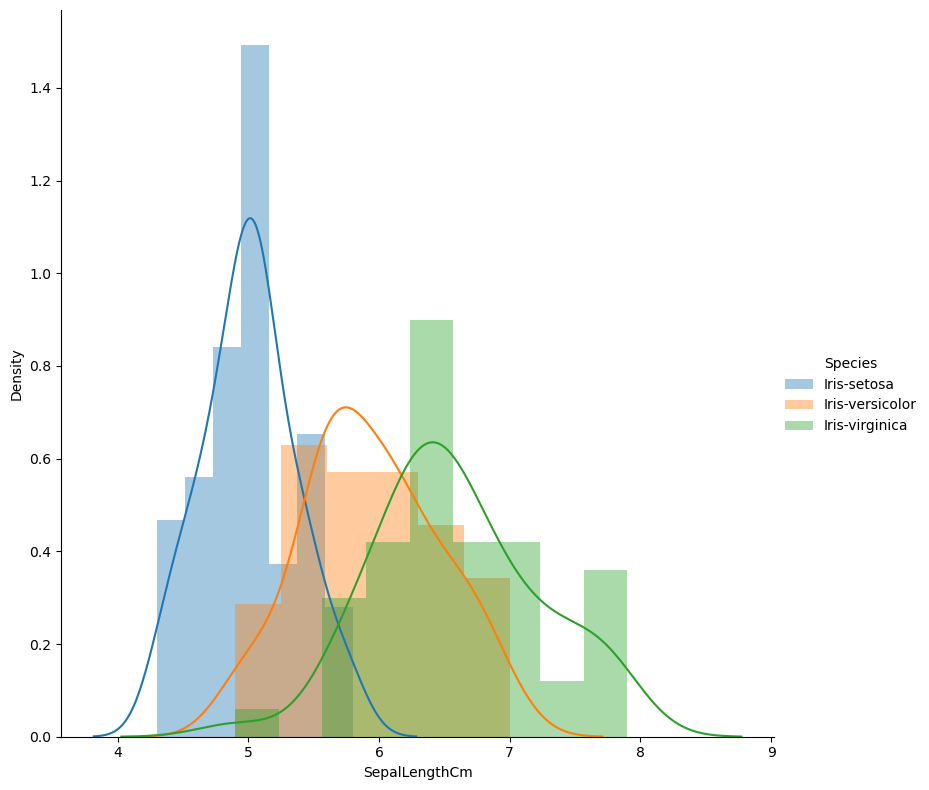

In [7]:
sns.FacetGrid(dataset,hue="Species",height=8) \
    .map(sns.distplot,"SepalLengthCm") \
    .add_legend()
plt.show()

**Histogram of sepal width**

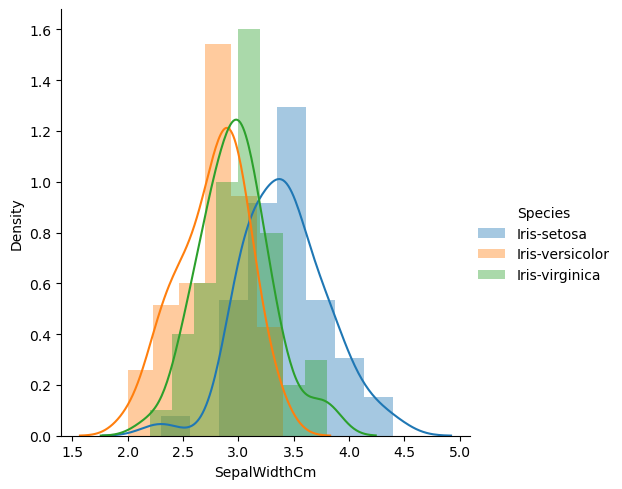

In [8]:
sns.FacetGrid(dataset,hue="Species",height=5) \
    .map(sns.distplot,"SepalWidthCm") \
    .add_legend()
plt.show()

**2D scatter plot**

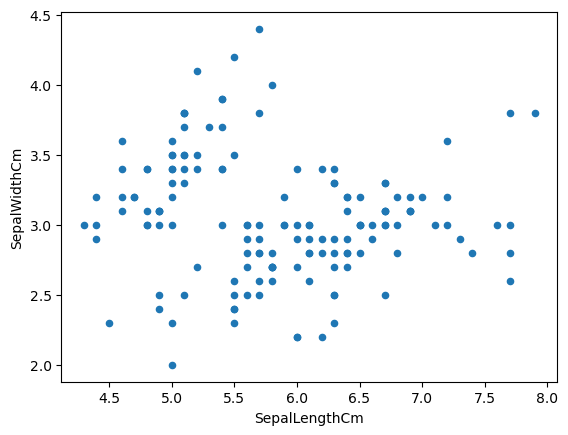

In [9]:
dataset.plot(kind='scatter', x='SepalLengthCm',y='SepalWidthCm')
plt.show()

**2D scatter plot with color-coding for each flower type/class.**

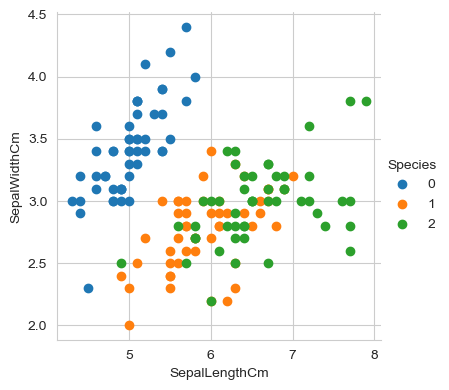

In [49]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue="Species", height=4 ) \
    .map(plt.scatter,"SepalLengthCm","SepalWidthCm") \
    .add_legend()
plt.show()

**Pairwise Scatter Plot**

# Data Preprocessing
<hr>

In [12]:
dataset["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
dataset.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**descriptive statistics of data set**

In [14]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Checking for Null Values**

In [15]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**label Encoding**

In [52]:
label_encoder = preprocessing.LabelEncoder() 
dataset['Species']= label_encoder.fit_transform(dataset['Species']) 

dataset['Species'].unique()
dataset


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [83]:
dataset['Species'].unique()


array([0, 1, 2])

**Splitting the dataSet**

In [66]:
X = dataset.iloc[:, [0,1,2,3]].values

y = dataset.iloc[:, 4].values

In [20]:
len(X)

150

In [21]:
len(y)

150

# Model Development
<hr>

**splitting the dataset into train set and test set**

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)


**Feature Scaling**

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model = LogisticRegression()
model.fit(X_train,y_train) 
prediction=model.predict(X_test) 




In [82]:
print('The accuracy of the Logistic Regression using Petals is:',accuracy_score(prediction,y_test))
rmse = sqrt(mean_squared_error(y_test, prediction))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, prediction))

The accuracy of the Logistic Regression using Petals is: 1.0
RMSE value = 0.00
R2 Score= 1.00


**Work by Somya Sourav Pradhan**